# Integration with Python - Part A - Introduction

$\newcommand{\d}{\mathrm{d}}$
$\newcommand{\p}{^{\prime}}$

While many integrals can be evaluated analytically, there are far more that lack a closed-form solution.  For such integrals, we are forced to resort to numerical techniques.  

As a reminder, the value of the integral of a function $f(x)$ from $x=a$ to $x=b$, $I(a,b)=\int_a^bf(x)\d x$, is given by the area under the curve $f(x)$ between $x=a$ and $x=b$.  

## The trapezoidal rule

Among the simplest ways to evaluate this area numerically is to divide the interval into $N$ uniform slices of width $h=\frac{b-a}{N}$, approximate the area under the curve in a given slice by the area of a trapezoid, and sum over all trapezoids/slices.

<div align="center">
<img src="../Images/fig5-1b.png" width="400"/>
     <figcaption>The trapezoidal approximation.</figcaption>
</div>

Following this method, we first divide the interval into slices with edges at $x$ values given by $x_k = a+kh$.  The area of the $k$th slice can be trivially calculated as $A_k = \frac{h}{2}[f(x_{k-1}) + f(x_k)]$, where $k \in [1,N]$.  Summing this over all $N$ slices yields the total integral
\begin{align}\label{trapezoidal}\tag{1}
    \int_a^b f(x)\d x \approx \sum_{k=1}^N A_k &= \frac{h}{2}\sum_{k=1}^N [f(x_{k-1}) + f(x_k)]\\
    &= \frac{h}{2}[f(x_0) + f(x_1) + f(x_1) + f(x_2) + \cdots + f(x_N)]\\
    &= \frac{h}{2}\left[f(a) + f(b) + 2\sum_{k=1}^{N-1}f(x_k)\right]
\end{align}

Let's apply this technique to an integral which can be solved analytically, so we can compare our numerical solution to the exact solution.  Consider the integral \begin{equation}
    \int_{-1}^1 (x^4-2x+1) \d x = \left[\frac{x^5}{5} - x^2 + x \right]_{-1}^1 = 2.4
\end{equation}

In [1]:
import numpy as np

# Define parameters for numerical integration
a = -1 # Lower bound
b = 1 # Upper bound

######################################################

def f(x):
    return x**4 - 2*x + 1

######################################################

def trapInt(func, x0, xf, nSlices):
    h=(b-a)/nSlices
    
    # Calculate a grid of x values
    xk = np.linspace(x0, xf, nSlices+1, float)

    # Calculate the corresponding values of f(x)
    yk = func(xk)

    # Calculate the integral
    result = .5*h * (yk[0] + yk[-1] + 2*np.sum(yk[1:-1]))
    
    return result

######################################################

integral = trapInt(f, a, b, 10)

print("Integral:",integral)
print("Error:{:.4f}%".format(100*(integral-2.4)/2.4))

Integral: 2.4265600000000003
Error:1.1067%


This is not terribly far from the true value, considering the simplicity of the method.  Let's see what happens if we gradually increase the value of $N$.

In [2]:
for N in [10, 20, 50, 100, 1000]:
    integral = trapInt(f, a, b, N)

    print("N:",N)
    print("Integral:",integral)
    print("Error:{:.4f}%".format(100*(integral-2.4)/2.4))
    print()

N: 10
Integral: 2.4265600000000003
Error:1.1067%

N: 20
Integral: 2.4066600000000005
Error:0.2775%

N: 50
Integral: 2.401066496
Error:0.0444%

N: 100
Integral: 2.400266656
Error:0.0111%

N: 1000
Integral: 2.4000026666656
Error:0.0001%



The value of the integral calculated using the trapezoidal rule is converging rather quickly to the true value.

### Approximation error

Keep in mind that we are summing a large number of floats when we use the trapezoidal rule.  As we learned, this leads to rounding error.  However, the rounding error is generally subdominant to the so-called "approximation error."

Let's consider the slice from $x_{k-1}$ to $x_k$ and perform a Taylor expansion of $f(x)$ around $x_{k-1}$:

\begin{align}
    f(x) &= \sum_{n=0}^{\infty}\frac{f^{(n)}(x_e)}{n!}(x-x_e)^n\\
    &= f(x_{k-1}) + f\p(x_{k-1})(x-x_{k-1}) + \frac{f^{\prime\prime}(x_{k-1})}{2!}(x-x_{k-1})^2 + \frac{f^{\prime\prime\prime}(x_{k-1})}{3!}(x-x_{k-1})^3 + \cdots
\end{align}
where the prime symbol is used to indicate the derivative with respect to $x$.  Integrating this function from $x_{k-1}$ to $x_k$ yields

\begin{equation}
    \int_{x_{k-1}}^{x_k}f(x)\d x = f(x_{k-1})\int_{x_{k-1}}^{x_k}\d x + f\p(x_{k-1})\int_{x_{k-1}}^{x_k}(x-x_{k-1})\d x + \frac{f^{\prime\prime}(x_{k-1})}{2!}\int_{x_{k-1}}^{x_k}(x-x_{k-1})^2\d x + \frac{f^{\prime\prime\prime}(x_{k-1})}{3!}\int_{x_{k-1}}^{x_k}(x-x_{k-1})^3\d x + \cdots\\
\end{equation}

After making the substitution $u=x-x_{k-1}$, this yields
\begin{align}
\int_{x_{k-1}}^{x_k}f(x)\d x &= f(x_{k-1})\int_0^h\d u + f\p(x_{k-1})\int_0^h u\d u + \frac{f^{\prime\prime}(x_{k-1})}{2}\int_0^hu^2\d u + \frac{f^{\prime\prime\prime}(x_{k-1})}{6}\int_0^hu^3\d u + \cdots\\
&= hf(x_{k-1}) + \frac{h^2}{2}f\p(x_{k-1}) + \frac{h^3}{6}f^{\prime\prime}(x_{k-1}) + \frac{h^4}{24}f^{\prime\prime\prime}(x_{k-1}) + \cdots \label{taylor1}\tag{2}\\
\end{align}.

Performing the same expansion around $x=x_k$ yields
\begin{equation}
     \int_{x_{k-1}}^{x_k}f(x)\d x = hf(x_{k}) \color{red}{-} \frac{h^2}{2}f\p(x_{k}) + \frac{h^3}{6}f^{\prime\prime}(x_{k}) \color{red}{-} \frac{h^4}{24}f^{\prime\prime\prime}(x_{k}) + \cdots
\label{taylor2}\tag{3}\\
\end{equation}.  
The minus signs affecting terms even in $h$ result from the fact that $x-x_k$ is negative, while $x-x_{k-1}$ is positive.


Taking the average of Equations 2 and 3 yields

\begin{equation}
\int_{x_{k-1}}^{x_k}f(x)\d x = \frac{h}{2}\left[f(x_{k-1})+f(x_{k})\right] + \frac{h^2}{4}\left[f\p(x_{k-1})\color{red}{-}f\p(x_{k})\right] + \frac{h^3}{12}\left[f^{\prime\prime}(x_{k-1})+f^{\prime\prime}(x_{k})\right] + \frac{h^4}{48}\left[f^{\prime\prime\prime}(x_{k-1})\color{red}{-}f^{\prime\prime\prime}(x_{k})\right] + \cdots
\end{equation}.

Finally, we can sum this expression over all $N$ slices to obtain the desired integral
\begin{align}
    \int_a^b f(x)\d x &= \sum_{k=1}^N \int_{x_{k-1}}^{x_k}f(x)\d x\\
    &= \frac{h}{2}\color{blue}{\sum_{k=1}^N}\left[f(x_{k-1})+f(x_{k})\right] + \frac{h^2}{4}\left[f\p(a)\color{red}{-}f\p(b)\right] + \frac{h^3}{12}\color{blue}{\sum_{k=1}^N}\left[f^{\prime\prime}(x_{k-1})+f^{\prime\prime}(x_{k})\right] + \frac{h^4}{48}\left[f^{\prime\prime\prime}(a)\color{red}{-}f^{\prime\prime\prime}(b)\right] + \cdots
\label{error}\tag{4}
\end{align}.  For terms even in $h$, the terms in the sum cancel, except for those evaluated at $x=a$ and $x=b$.  Note that this relation is exact provided that we consider all terms in the (infinite) sum.  Fortunately, $h$ is typically a small number, so each term on the right-hand side of Equation 4 should be smaller than all those that preceed it.  Therefore, many of these can be neglected (depending on the desired accuracy).

Comparing Equations 1 and 4, we see that the first term on the right-hand side of Equation 4 is the same as the right-hand side of Equation 1.  So, when we use the trapezoidal rule, we are neglecting all but the first term of this infinite series.  The size of these neglected terms are therefore related to the approximation error of the trapezoidal method.

Let's examine these terms further.  Consider the integral $\int_a^b f^{\prime\prime}(x)\d x$.  We can approximate this integral with the trapezoidal rule, by using Equation 1 with the replacement $f(x)\rightarrow f^{\prime\prime}(x)$, which yields
\begin{equation}
\int_a^b f^{\prime\prime}(x)\d x \approx \frac{h}{2}\sum_{k=1}^N [f^{\prime\prime}(x_{k-1}) + f^{\prime\prime}(x_k)]
\end{equation}.  Aside from a multiplicative constant, this is the same as the third term on the right-hand side of Equation 4.  Let's rearrange (and simplify) this expression, so we can substitute it into Equation 4:
\begin{align}
    \int_a^b f^{\prime\prime}(x)\d x &\approx \frac{h}{2}\sum_{k=1}^N [f^{\prime\prime}(x_{k-1}) + f^{\prime\prime}(x_k)]\\
    \frac{h^2}{6}\int_a^b f^{\prime\prime}(x)\d x &\approx \frac{h^3}{12}\sum_{k=1}^N\left[f^{\prime\prime}(x_{k-1})+f^{\prime\prime}(x_{k})\right]\\
    \frac{h^2}{6} \left[f\p(b) - f\p(a)\right] &\approx \frac{h^3}{12}\sum_{k=1}^N\left[f^{\prime\prime}(x_{k-1})+f^{\prime\prime}(x_{k})\right]\\
\end{align}

Substituting the left-hand side of this equation into Equation 4 yields
\begin{equation}
     \int_a^b f(x)\d x = \frac{h}{2}\color{blue}{\sum_{k=1}^N}\left[f(x_{k-1})+f(x_{k})\right] + \frac{h^2}{12}\left[f\p(a)\color{red}{-}f\p(b)\right] + \frac{h^4}{48}\left[f^{\prime\prime\prime}(a)\color{red}{-}f^{\prime\prime\prime}(b)\right] + \cdots
\end{equation}

Again, the first term in this sum is equal to the right-hand side of Equation 1.  Therefore, the approximation error $\epsilon$ associated with the trapezoidal method is dominated by the second term
\begin{equation}\label{epsilon}\tag{5}
    \epsilon \approx \frac{h^2}{12}\left[f\p(a)\color{red}{-}f\p(b)\right]
\end{equation}.  Clearly, to minimize the approximation error, we should minimize $h$, which is consistent with our observations above.

Returning to our example above, the approximation error would be $\epsilon \approx \frac{h^2}{12}\left[(4a^3-2)-(4b^3-2)\right] = \frac{h^2}{3}\left[a^3-b^3\right] = \frac{h^2}{3}\left[(-1)^3-1^3\right] = \frac{-2h^2}{3}$.  For $N=10$, $h=0.2$ and $\epsilon \approx \frac{-2\times0.2^2}{3} = -0.0266$, which is almost exactly the difference between our numerical result and the true value.  

Keep in mind that we often don't have the functional form $f(x)$, so we can't always apply Equation 5 directly.  We may simply have a collection of data points that we wish to integrate, which is all we need for numerical integration.

### Practical application

Typically, we will choose some reasonable number of steps $N_1$ and perform numerical integration, resulting in the calculated integral $I_1$.  We then double the number of steps ($N_2=2N_1$) and integrate numerically, obtaining the value $I_2$.  In both cases, we know the error is proportional to $h^2$, so true value of the integral $I$ should be related to our estimates by $I = I_i + ch_i^2$ where $c$ is some unknown constant.  Equating both of these expressions for $I$ gives
\begin{equation}
    I_1 + ch_1^2 = I_2 + ch_2^2
\end{equation}
or
\begin{equation}
    I_2-I_1 = c(h_1^2-h_2^2) = c(4h_2^2-h_2^2)=3ch_2^2
\end{equation}.
The error on our second estimate $I_2$ is given by $ch_2^2 = \frac{1}{3}(I_2-I_1)$, which we can calculate trivially.  If the absolute value of this error is sufficiently small, we're done.  If not, double the number of steps and repeat, until the desired accuracy has been acheived.  This is known as "adaptive integration."

## Simpson's rule

In effect, the trapezoidal rule approximates the function (within a given slice) as a first-order polynomial (line).  We can uniquely determine the linear function based on any two sample points.  

We can improve the accuracy of our approximation by instead approximating the function using a second-order polynomial.  To uniquely determine the second-order polynomial, three sample points are required.  This requires combining adjacent slices, as shown in the Figure below.

<div align="center">
<img src="../Images/fig5-2.png" width="400"/>
     <figcaption>Simposon's rule.</figcaption>
</div>

Let's assume we have three sample points at $x=-h, 0, h$.  We can evaluate our polynomial ($Ax^2 + Bx +C$) at these three points:
\begin{align}
    f(-h) &= Ah^2 - Bh + C\\
    f(0)  &= C\\
    f(h)  &= Ah^2 + Bh + C\\
\end{align}.

This represents a system of three equations with three unknowns, which can be solved to yield:
\begin{align}
    A&=\frac{1}{h^2}\left[\frac{1}{2}f(-h)-f(0)+\frac{1}{2}f(h)\right]\\
    B&=\frac{1}{2h}\left[f(h)-f(-h)\right]\\
    C&=f(0)
\end{align}.

From these relations, we can calculate the integral in this region.
\begin{equation}
   \int_{-h}^h \left(Ax^2 + Bx+C\right) = \left[ \frac{1}{3}Ax^3+\frac{1}{2}Bx^2+Cx \right]_{-h}^h  = \frac{2}{3}Ah^3+2Ch =\frac{h}{3}\left[f(-h)+4f(0)+f(h)\right]
\end{equation}

The above relation gives the approximate integral of $f(x)$ within a given pair of slices.  To get the total integral, we sum this over all pairs of slices.
\begin{equation}
    I(a,b) = \frac{h}{3}\sum_{\substack{k=1 \\ k\in\mathrm{odd}}}^N \left[ f(x_{n-1}) + 4f(x_n) + f(x_{n+1}) \right]
\end{equation}.  Expanding the sum yields
\begin{align}\label{simpson}\tag{6}
    I(a,b) &= \frac{h}{3}\left[f(x_{0}) + 4f(x_1) + f(x_{2})\right] + \frac{h}{3}\left[f(x_{2}) + 4f(x_3) + f(x_{4})\right] + \frac{h}{3}\left[ f(x_{4}) + 4f(x_5) + f(x_{6}) \right] +\cdots\\
           &= \frac{h}{3}\left[f(x_{0}) + 4f(x_1) + 2f(x_2) + 4f(x_3) + 2f(x_4) + \cdots\right] \\
           &= \frac{h}{3}\left[f(a) + f(b) + 4\sum_{\substack{k=1 \\ k\in\mathrm{odd}}}^{N-1}f(a+kh) + 2\sum_{\substack{k=2 \\ k\in\mathrm{even}}}^{N-2}f(a+kh)\right]\\
\end{align}.

This relation is known as "Simpson's rule."  It is rather similar to Equation 1, only slightly more complicated.

Let's see how the performance of this approximation compares to the trapezoidal rule.

In [3]:
def simpInt(func, x0, xf, nSlices):
    h=(b-a)/nSlices
    
    # Calculate a grid of x values
    xk = np.linspace(x0, xf, nSlices+1, float)

    # Calculate the corresponding values of f(x)
    yk = func(xk)

    # Calculate the integral
    result = (h/3) * (yk[0] + yk[-1] + 4*np.sum(yk[1:-1:2]) + 2*np.sum(yk[2:-1:2]) )   #THIS IS THE ONLY LINE WHICH DIFFERS COMPARED TO TrapInt
    
    return result

for N in [10, 20, 50, 100, 1000]:
    integralT = trapInt(f, a, b, N)
    integralS = simpInt(f, a, b, N)

    print("N:",N)
    print("{:10}{:18}{:18}".format("","Trapezoidal","Simpson's"))
    print("{:10}{:<18.12f}{:<18.12f}".format("Integral:",integralT, integralS))
    print()

N: 10
          Trapezoidal       Simpson's         
Integral: 2.426560000000    2.400426666667    

N: 20
          Trapezoidal       Simpson's         
Integral: 2.406660000000    2.400026666667    

N: 50
          Trapezoidal       Simpson's         
Integral: 2.401066496000    2.400000682667    

N: 100
          Trapezoidal       Simpson's         
Integral: 2.400266656000    2.400000042667    

N: 1000
          Trapezoidal       Simpson's         
Integral: 2.400002666666    2.400000000004    



Using Simpson's rule yields more accurate results which converge to the true value for much smaller $N$.  

When using Simpson's rule, we can follow an adaptive approach, as discussed above.  In this case, the error is given by $\epsilon=\frac{1}{15}(I_2-I_1)$.

## Higher-order integration

To achieve even faster convergence, we could use a higher-order polynomial to approximate the function $f(x)$ within a given slice.  Using four points, we can uniquely determine a third-order polynomial.  In general, we need $N+1$ points to uniquely determine an $N$th-order polynomial. 

Regardless of the choice of polynomial order, the procedure is similar.  Simply sum over the values of $f(x_k)$, applying appropriate "weights" $w_k$ to each point, then multiply by $h$:
\begin{equation}\label{weights}\tag{7}
    \int_a^b f(x)\d x \approx h\sum_{k=1}^Nw_kf(x_k)
\end{equation},
where the weights are given by:
 * For a first-order polynomial, the weights are $\frac{1}{2}$ for the first and last points, and 1 for all others (see Equation 1).
 * For a second-order polynomial, the weights are $\frac{1}{3}$ for the first and last points, and $\frac{4}{3}$ for odd $k$, and $\frac{2}{3}$ for even $k$ (see Equation 6).
 * The weights for third- and fourth-order polynomials are available in the textbook.
 
 ### Gaussian quadrature

Taking higher-order integration methods to the extreme, we could approximate the entire integrand $f(x)$ with a single polynomial of order $N-1$ (assuming we have $N$ sample points).  By choosing appropriate polynomial coefficients, this function should perfectly reproduce the values $f(x)$ at each of our sample points (but not necesarrily in between).

In the context of Gaussian quadrature, degree $N-1$ "interpolating polynomials" are used, with the following definition:
\begin{align}%\label{gauss}\tag{8}
    \phi_k(x) &= \prod_{\substack{m=1\cdots N \\ m\neq k}}\frac{x-x_m}{x_k-x_m}\\
    &=\frac{x-x_1}{x_k-x_1}\times\cdots\times\frac{x-x_{k-1}}{x_k-x_{k-1}}\times\frac{x-x_{k+1}}{x_k-x_{k+1}}\times\cdots\times\frac{x-x_N}{x_k-x_N}
\end{align}.  The numerator of these $N$ polynomials contain one factor for each sample point, except $x=x_k$.

Let's see if we can simplfy this expression, by evaluating one such polynomial at $x=x_k$:
\begin{align}
    \phi_k(x_k) &= \frac{x_k-x_1}{x_k-x_1}\times\cdots\times\frac{x_k-x_{k-1}}{x_k-x_{k-1}}\times\frac{x_k-x_{k+1}}{x_k-x_{k+1}}\times\cdots\times\frac{x_k-x_N}{x_k-x_N}
\end{align}.  Since each term in the product is one, $\phi_k(x_k)=1$.  

Let's also evaluate $\phi_k(x)$ at $x=x_{k+1}$:
\begin{align}
    \phi_k(x_{k+1}) &= \frac{x_{k+1}-x_1}{x_k-x_1}\times\cdots\times\frac{x_{k+1}-x_{k-1}}{x_k-x_{k-1}}\times\frac{\color{blue}{x_{k+1}-x_{k+1}}}{x_k-x_{k+1}}\times\cdots\times\frac{x_{k+1}-x_N}{x_k-x_N}
\end{align}. Exactly one term in the product is now zero, making $\phi_k(x_{k+1})=0$.  The same holds true for all other sample points (with $m\neq k$).  Thus, $\phi_k(x_m) = \delta_{km}$, 
where $\delta_{km}$ is the Kronecker delta function (which equals one when $k=m$ and zero otherwise).

Now consider the function $\Phi(x) = \sum_{k=1}^Nf(x_k)\phi_k(x)$.  Evaluating this function at a particular sample point $x=x_m$, yields
\begin{align}
    \Phi(x_m) &= \sum_{k=1}^Nf(x_k)\phi_k(x_m) = \sum_{k=1}^Nf(x_k)\delta_{km} = f(x_m)
\end{align}.
This holds for any given sample point $x_m$, so the function $\Phi(x)$ perfectly reproduces the values of the integrand $f(x)$ at all sample points.

Given the function $\Phi(x)$, we can simply integrate it from $x=a$ to $x=b$ to obtain the approximate integral of $f(x)$:
\begin{align}\tag{8}
    \int_a^bf(x)\d x \approx \int_a^b\Phi(x)\d x = \int_a^b \sum_{k=1}^Nf(x_k)\phi_k(x) \d x = \sum_{k=1}^N f(x_k) \int_a^b \phi_k(x) \d x
\end{align}.  Thus, the problem has been reduced to a series of integrals over the interpolating polynomials.

Unfortunately, no general closed-form expression for the integral of the interpolating polynomials exists, and we are forced to resort to other numerical integration methods to perform these integrals.  However, note that these integrals depend only on the location of sample points $x_k$, and not the function $f(x)$ that we actually wish to integrate.  Once the integrals of the interpolating polynomials have been calculated, the results can be used to perform integration of many different functions $f(x)$.

#### Example

Let's apply Gaussian quadrature to integrate our example function $f(x)=x^4-2x+1$.  First, we calculate the interpolating polynomials.

(-0.6, 2.3)

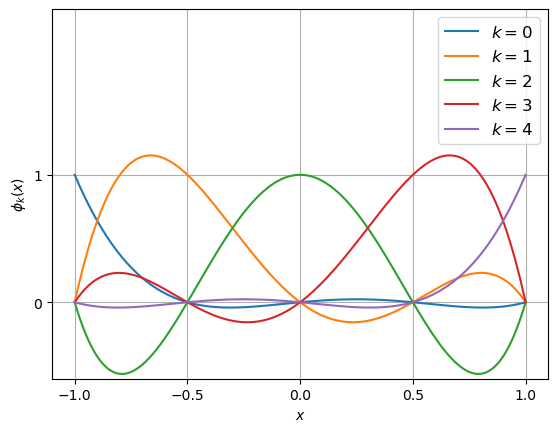

In [4]:
import matplotlib.pyplot as plt

#phi_k(x) given a grid of x_k values
def phi_k(x, k, xk):
    result = 1
    
    for m,xm in enumerate(xk):
        if m==k: continue
        result *= (x - xm)/(xk[k] - xm)

    return result

#############################################

N = 5   #only 5 sample points at x = -1, -0.5, 0, 0.5, 1

xk = np.linspace(a, b, N, float)   
denseXValues = np.linspace(a, b, 1000, float)   #for plotting purposes only

plt.figure()
plt.plot(denseXValues, phi_k(denseXValues, 0, xk), label="$k=0$")
plt.plot(denseXValues, phi_k(denseXValues, 1, xk), label="$k=1$")
plt.plot(denseXValues, phi_k(denseXValues, 2, xk), label="$k=2$")
plt.plot(denseXValues, phi_k(denseXValues, 3, xk), label="$k=3$")
plt.plot(denseXValues, phi_k(denseXValues, 4, xk), label="$k=4$")


plt.xlabel("$x$")
plt.ylabel("$\phi_k(x)$")
plt.xticks(xk)
plt.yticks([0,1])
plt.grid(True, which='major', axis='both')
plt.legend(loc='upper right', fontsize='large')
plt.ylim(-.6, 2.3)

As claimed, each of the $\phi_k(x)$ are equal to one when evaluated at $x=x_k$ and zero for all other sample points.  

Now, let's compare our order $N-1$ polynomial $\Phi(x) = \sum_{k=1}^Nf(x_k)\phi_k(x)$ to the integrand $f(x)$ that we wish to approximate, over the entire range of integration.

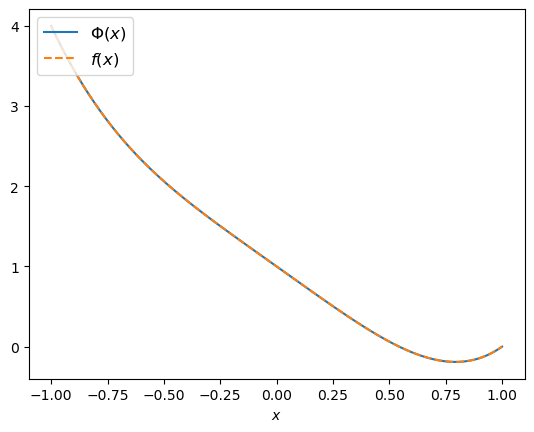

In [5]:
Phi = 0
for k in range(N):
    Phi += f(denseXValues)*phi_k(denseXValues, k, xk)
    
plt.figure()
plt.plot(denseXValues, Phi, label="$\Phi(x)$")
plt.plot(denseXValues, f(denseXValues), linestyle='dashed', label="$f(x)$")

plt.xlabel("$x$")
plt.legend(loc='upper left', fontsize='large')

In this case, $\Phi(x)$ perfectly (within machine precision) reproduces the integrand $f(x)$.  This is expected, provided $f(x)$ is a polynomial of order $N-1$ or lower.  For other cases, $\Phi(x)$ merely approximates $f(x)$.

Next, we can integrate the interpolating polynomials.

In [6]:
polyInt = []
for k in range(N):
    
    #define a new function which takes a single argument x, since this is what is expected by simpInt
    def phi(x):
        return phi_k(x, k, xk)
    
    polyInt.append(simpInt(phi, a, b, 10))   #just 10 sample points for integration of interpolating polynomials

Finally, calculate the integral of our function using Equation 8.

In [7]:
I = 0
for k in range(N):
    I += f(xk[k]) * polyInt[k]
    
I

2.4004266666666663

As a reminder, the true value of this integral is 2.4.  We were able to obtain a fairly precise result with just 10 sample points for the integration of the interpolating polynomials.

If we want to integrate another function, $f_2(x) = 5x^3 - 18x^2$, over the same domain:

In [8]:
def f2(x):
    return 5*x**3 - 18*x**2

I = 0
for k in range(N):
    I += f2(xk[k]) * polyInt[k]
    
I

-12.0

The true value of this integral is -12.  Our result is quite precise, with minimal effort.

With just slightly more effort, we can perform integrals over another domain of integration.  For alternative domains of integration, we must rescale the integrals of the interpolating polynomials by the factor $\frac{1}{2}\left(b-a\right)$.

Let's integrate $f_2(x)$ over the range $x=10$ to $x=15$, using the integrals of the interpolating polynomials we calculated above.

In [9]:
aPrime=10
bPrime=15

#xkPrime = .5*(bPrime-aPrime)*xk + .5*(bPrime+aPrime)
xkPrime = np.linspace(aPrime, bPrime, N, float)   

I = 0
for k in range(N):
    I += f2(xkPrime[k]) * .5*(bPrime-aPrime)*polyInt[k]   #reusing the same integrals of the interpolating polynomials over the original domain calculated above
    
I

36531.25

The true value of this integral is 36531.3, very close to the value we calculated with just a few lines of code.

## Integrals over an infinite range

Often, we need to perform integrals which extend to $x=\pm\infty$, which can be calculated using the same techniques as above.  We must simply perform a change of variables, defining $z=\frac{x}{1+x}$.  In terms of $z$, $x$ is given by $\frac{z}{1-z}$, and $\d x=\frac{\d z}{(1-z)^2}$.  With these definitions, we can recast our integral over an infinite range to an integral over a finite domain.  

For example, let's assume we wish to integrate some function $f(x)$ from zero to $\infty$:
\begin{equation}
    \int_0^{\infty} f(x)\d x = \int_0^1 \frac{1}{\left(1-z\right)^2}f\left(\frac{z}{1-z}\right)\d z
\end{equation}.  The right-hand side of this equation can be evaluated using the techniques discussed above.

## Integrals with non-uniform sample points

So far, we have used an evenly spaced grid of sample points to perform our integrals.  However, this is not required.  In fact, to obtain the highest precision possible with Gaussian quadrature, we should choose our sample points to coincide with the zeros of the $N$th Legendre polynomial.  A detailed discussion of this topic is beyond the scope of the course.



## Integration with SciPy

Now that we know how to do numerical integration "by hand," we should also be aware that there are python libraries that can do this for us!  Information on these tools can be found here:
 * https://docs.scipy.org/doc/scipy/tutorial/integrate.html
 * https://docs.scipy.org/doc/scipy/reference/integrate.html

The main SciPy function used for integration is `quad()`.  It requires a fit function, the bounds of integration, and (optionally) a desired tolerance.  It uses 9 different methods and attempts to find an estimated integral within the error tolerance requested.

In [10]:
import scipy.integrate as integrate

integral,error = integrate.quad(f, -1, 1)

print("Integral:",integral)
print("Error:",error)

Integral: 2.4
Error: 2.791763041687271e-14


For fit functions with multiple paramters, the parameter values should be passed to the `quad()` function via the `args` argument.

In [11]:
#phi_k(x, k, xk)

integral,error = integrate.quad(phi_k, -1, 1, args=(1,xk))

print("Integral:",integral)
print("Error:",error)

Integral: 0.7111111111111111
Error: 8.996436316393843e-15


We can also use SciPy to perform two-dimensional integrals, using the `dblquad()` function.

In [12]:
def f2D(x,y):
    return x*(y**2)
    
integral,error = integrate.dblquad(f2D, 0, 2, 0, 2)

print("Integral:",integral)
print("Error:",error)

Integral: 5.333333333333334
Error: 8.843253934323537e-14
